# Le kmean appliqué à la reconnaissance d'images : digit recognition

Nous allons vous montrer un example qui fonctionne, puis vous donner une base de données sur laquelle vous pourrez vous exercer.

#### Here is a working example

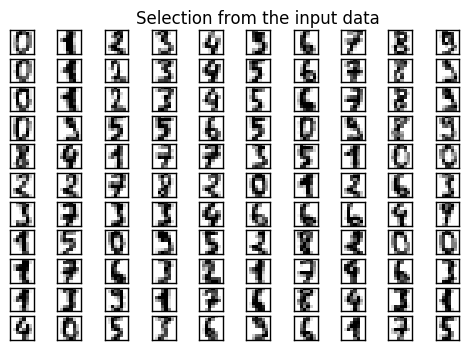

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits


# load the data
digits = load_digits()
data = digits.data
y = digits.target

# turn data into a 4x11 grid
real_data = digits.data[:110].reshape((11, 10, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(11, 10, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(10):
    for i in range(11):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')

ax[0, 5].set_title('Selection from the input data')


plt.show()

#### zoom sur un image

Automatically created module for IPython interactive environment


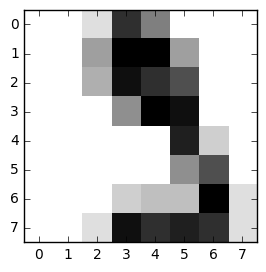

In [10]:
print(__doc__)

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

from sklearn import datasets

import matplotlib.pyplot as plt

#Load the digits dataset
digits = datasets.load_digits()

#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[31], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

###### beaucoup d'objets

In [31]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 500

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia    homo   compl  v-meas     ARI AMI  silhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1

print(79 * '_')

Automatically created module for IPython interactive environment
n_digits: 10, 	 n_samples 1797, 	 n_features 64
_______________________________________________________________________________
init    time  inertia    homo   compl  v-meas     ARI AMI  silhouette
k-means++   0.41s    69432   0.602   0.650   0.625   0.465   0.598    0.138
   random   0.33s    69694   0.669   0.710   0.689   0.553   0.666    0.155
_______________________________________________________________________________


##### Visualiser les données en 2 dimensions, alors qu'audébut c'est en dimension 64 (8x8 pixels)

PCA, on ne rentre pas dans les détails, mais cela permet de réduire la dimension.

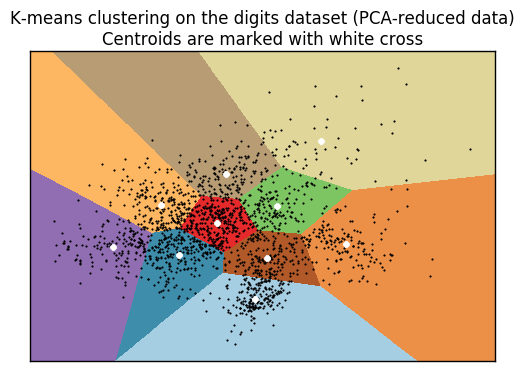

In [36]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=10, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### A vous !

Le but de cet exercice est d'utiliser la méthode kmean pour classifier des images de chiffres.

Vous avez pour entraîner votre classifieur le même type de données que pour le knn. Un **data_train**, une matrice qui a 1300 observations (1300 images de chiffres), et 64 variables (8x8 pixels).

Votre objectif est de runner un kmean pour faire des clusters grâce à vos données **data_train**.

Puisqu'il s'agit d'un algorithme non supervisé, vous allez obtenir des clusters où il y aura des observations dont les outcomes sont différents (par exemple au sein du cluster A il y aura certainement des observations dont l'outcome est 2, et d'autres dont l'outcome est le chiffre 7). Vous devrez trouver le chiffre qui est majoritaire dans ce cluster pour dire que ce cluster est le cluster de ce chiffre.

Donc il vous faut écrire un petit code qui permet de matcher (relier) un cluster au label (ici un chiffre) le plus probable. Indice : pour ce faire vous pouvez utiliser **y_train**.

Avec cela, vous pouvez maintenant tester votre classifieur grâce à **data_test** et **y_test**. Pensez à donner le taux de bonne classification.

##### import des données

In [1]:
from sklearn import metrics
from sklearn.cluster import KMeans
n_digits = len(np.unique(digits.target))
nb_train = 1300
data_train = digits.data[:nb_train]
y_train = y[:nb_train]

y_test = y[nb_train:]
data_test = digits.data[nb_train:]

NameError: name 'np' is not defined